In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm

In [27]:
df = pd.read_csv('./Data/bmi_500.csv')

In [28]:
#One=Hot 인코딩
one_hot = pd.get_dummies(df['Label']).astype(int)
df = pd.concat([df,one_hot], axis = 1)

In [29]:
for i in one_hot.columns:
    df['interaction_{}'.format(i)] = df['Height'] * df[i]

In [30]:
clm = ['Height'] + list(df.columns[-12:])

In [31]:
x = df[clm]
x = sm.add_constant(x)
y = df['Weight']

model = sm.OLS(y,x)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          1.18e-185
Time:                        12:22:58   Log-Likelihood:                -1991.0
No. Observations:                 500   AIC:                             4006.
Df Residuals:                     488   BIC:                             4056.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -26.8854     14.766     -1.821      0.069     -55.899       2.128
Height                          0.5746      0.080      7.209      0.000       0.418       0.731
Extreme Obesity                39.9695     17.264      2.315      0.021       6.049      73.890
Extremely Weak                104.6959     66.068      1.585      0.114     -25.117     234.509
Normal                        -26.2896     22.567     -1.165      0.245     -70.630      18.051
Obesity                       -78.2209     18.371     -4.258      0.000    -114.316     -42.125
Overweight                    -51.2726     21.375     -2.399      0.017     -93.271      -9.275
Weak                          -15.7677     54.525     -0.289      0.773    -122.900      91.364
interaction_Extreme Obesity     0.1696      0.097      1.748      0.081      -0.021       0.360
interaction_Extremely Weak     -0.7139      0.352     -2.027      0.043      -1.406      -0.022
interaction_Normal              0.1270      0.126      1.008      0.314      -0.121       0.375
interaction_Obesity             0.6508      0.101      6.421      0.000       0.452       0.850
interaction_Overweight          0.3632      0.118      3.069      0.002       0.131       0.596
interaction_Weak               -0.0222      0.295     -0.075      0.940      -0.601       0.557
==============================================================================
Omnibus:                        7.009   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.404
Skew:                          -0.010   Prob(JB):                      0.00551
Kurtosis:                       3.706   Cond. No.                     3.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
clm = ['Height'] + list(df.columns[-12:])
temp = df[clm]

In [33]:
df['Height'].corr(df['Normal'])

np.float64(0.10558478597678096)

In [34]:
#상관관계 표시

mat= pd.DataFrame(columns = clm, index = clm)

for i in clm: #df[clm].corr()
    for w in clm:
        mat[i].loc[w] = df[i].corr(df[w])

In [35]:
mat

,Height,Extreme Obesity,Extremely Weak,Normal,Obesity,Overweight,Weak,interaction_Extreme Obesity,interaction_Extremely Weak,interaction_Normal,interaction_Obesity,interaction_Overweight,interaction_Weak
Height,1.0,-0.443698,0.175723,0.105585,0.142506,0.146517,0.194468,-0.378785,0.179802,0.131407,0.191857,0.178353,0.199191
Extreme Obesity,-0.443698,1.0,-0.132293,-0.323978,-0.479954,-0.321249,-0.173711,0.993573,-0.132138,-0.322825,-0.477382,-0.319837,-0.173526
Extremely Weak,0.175723,-0.132293,1.0,-0.065372,-0.096845,-0.064822,-0.035051,-0.131443,0.998826,-0.06514,-0.096326,-0.064537,-0.035014
Normal,0.105585,-0.323978,-0.065372,1.0,-0.237168,-0.158744,-0.085839,-0.321895,-0.065295,0.996441,-0.235897,-0.158047,-0.085747
Obesity,0.142506,-0.479954,-0.096845,-0.237168,1.0,-0.235171,-0.127165,-0.47687,-0.096732,-0.236324,0.99464,-0.234137,-0.12703
Overweight,0.146517,-0.321249,-0.064822,-0.158744,-0.235171,1.0,-0.085116,-0.319184,-0.064746,-0.158179,-0.23391,0.995606,-0.085025
Weak,0.194468,-0.173711,-0.035051,-0.085839,-0.127165,-0.085116,1.0,-0.172594,-0.03501,-0.085533,-0.126484,-0.084742,0.998936
interaction_Extreme Obesity,-0.378785,0.993573,-0.131443,-0.321895,-0.47687,-0.319184,-0.172594,1.0,-0.131288,-0.32075,-0.474314,-0.317782,-0.172411
interaction_Extremely Weak,0.179802,-0.132138,0.998826,-0.065295,-0.096732,-0.064746,-0.03501,-0.131288,1.0,-0.065063,-0.096213,-0.064461,-0.034973
interaction_Normal,0.131407,-0.322825,-0.06514,0.996441,-0.236324,-0.158179,-0.085533,-0.32075,-0.065063,1.0,-0.235058,-0.157484,-0.085442


In [36]:
mat = mat.astype(float)

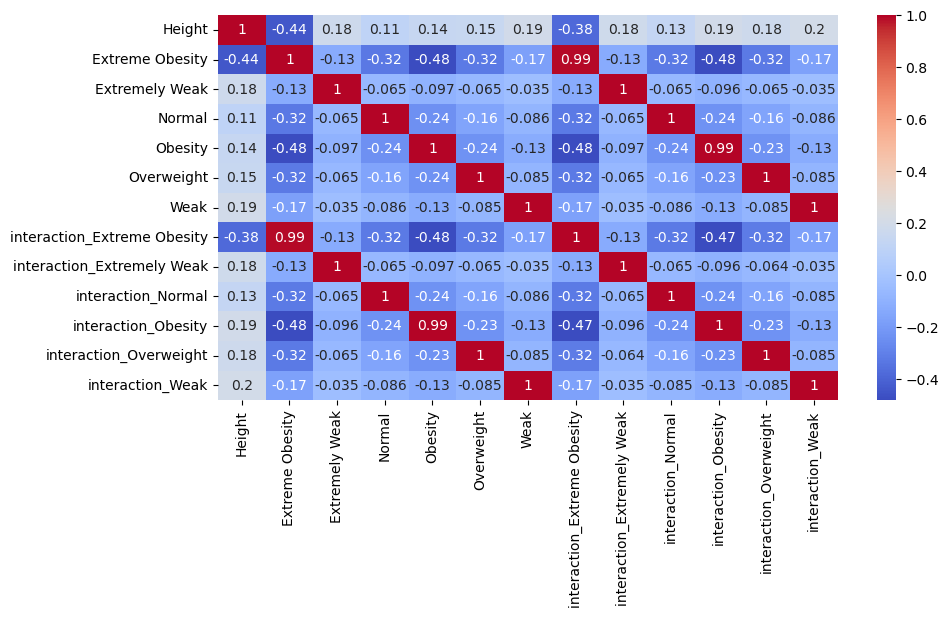

In [37]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.heatmap(mat, cmap = 'coolwarm', annot = True)
plt.show()

In [38]:
x = df[clm]
#x = sm.add_constant(x)

y = df['Weight']

moodel = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          1.18e-185
Time:                        12:23:00   Log-Likelihood:                -1991.0
No. Observations:                 500   AIC:                             4006.
Df Residuals:                     488   BIC:                             4056.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -26.8854     14.766     -1.821      0.069     -55.899       2.128
Height                          0.5746      0.080      7.209      0.000       0.418       0.731
Extreme Obesity                39.9695     17.264      2.315      0.021       6.049      73.890
Extremely Weak                104.6959     66.068      1.585      0.114     -25.117     234.509
Normal                        -26.2896     22.567     -1.165      0.245     -70.630      18.051
Obesity                       -78.2209     18.371     -4.258      0.000    -114.316     -42.125
Overweight                    -51.2726     21.375     -2.399      0.017     -93.271      -9.275
Weak                          -15.7677     54.525     -0.289      0.773    -122.900      91.364
interaction_Extreme Obesity     0.1696      0.097      1.748      0.081      -0.021       0.360
interaction_Extremely Weak     -0.7139      0.352     -2.027      0.043      -1.406      -0.022
interaction_Normal              0.1270      0.126      1.008      0.314      -0.121       0.375
interaction_Obesity             0.6508      0.101      6.421      0.000       0.452       0.850
interaction_Overweight          0.3632      0.118      3.069      0.002       0.131       0.596
interaction_Weak               -0.0222      0.295     -0.075      0.940      -0.601       0.557
==============================================================================
Omnibus:                        7.009   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.404
Skew:                          -0.010   Prob(JB):                      0.00551
Kurtosis:                       3.706   Cond. No.                     3.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

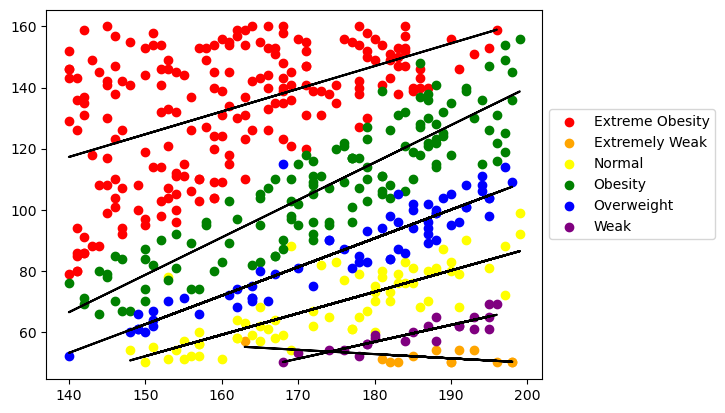

In [39]:
#조절변수의 영향력을 확인

import warnings
warnings.filterwarnings(action = 'ignore')

moderator = clm[1:7]
main_eff = result.params[2:8]

interaction_col = clm[7:]
interaction_eff = result.params[8:]

colors = ['red','orange','yellow','green','blue','purple']

for i in range(6):
    temp = df[df['Label'] == moderator[i]]
    plt.scatter(temp['Height'], temp['Weight'] , color = colors[i], label = moderator[i])

    #각 레이블별 회귀식 계산 후 회귀선 그림
    temp["estimation"] = result.params["const"] + result.params["Height"] * temp["Height"] + main_eff[i] * temp[moderator[i]] + interaction_eff[i] * temp[interaction_col[i]]
    plt.plot(temp["Height"], temp["estimation"], color = "black")
    
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left')
plt.show()

각 Lable 별 회귀선을 그린것. 조절변수와 독립변수의 관계, 영향력 확인하기 위함    
Scatter를 가장 잘 설명하는 회귀선이 독립변수를 가장 잘 설명하는 조절변수이다.

In [40]:
clm = ['Height'] + list(df.columns[-12:])
clm.remove('Normal')
clm.remove('interaction_Normal')

X = df[clm]
X = sm.add_constant(X)

y = df['Weight']

model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          1.18e-185
Time:                        12:23:01   Log-Likelihood:                -1991.0
No. Observations:                 500   AIC:                             4006.
Df Residuals:                     488   BIC:                             4056.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -53.1750     20.192     -2.633      0.009     -92.849     -13.501
Height                          0.7016      0.116      6.074      0.000       0.475       0.929
Extreme Obesity                66.2591     22.797      2.906      0.004      21.467     111.052
Extremely Weak                130.9855     78.826      1.662      0.097     -23.894     285.865
Obesity                       -51.9313     23.978     -2.166      0.031     -99.044      -4.819
Overweight                    -24.9830     27.241     -0.917      0.360     -78.508      28.542
Weak                           10.5218     65.304      0.161      0.872    -117.789     138.833
interaction_Extreme Obesity     0.0426      0.133      0.321      0.748      -0.218       0.304
interaction_Extremely Weak     -0.8409      0.422     -1.993      0.047      -1.670      -0.012
interaction_Obesity             0.5237      0.137      3.817      0.000       0.254       0.793
interaction_Overweight          0.2362      0.155      1.523      0.128      -0.069       0.541
interaction_Weak               -0.1492      0.355     -0.420      0.674      -0.847       0.548
==============================================================================
Omnibus:                        7.009   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.404
Skew:                          -0.010   Prob(JB):                      0.00551
Kurtosis:                       3.706   Cond. No.                     2.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
df['Gender'] = [1 if i == 'Male' else 0 for i in df['Gender']]

clm = ['Height'] + list(df.columns[-12:])
clm.remove('Normal')
clm.remove('interaction_Normal')

X = df[clm]
X = sm.add_constant(X)

y = df['Gender']

model = sm.Logit(y,X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.680920
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Gender   No. Observations:                  500
Model:                          Logit   Df Residuals:                      488
Method:                           MLE   Df Model:                           11
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                 0.01736
Time:                        12:23:01   Log-Likelihood:                -340.46
converged:                       True   LL-Null:                       -346.47
Covariance Type:            nonrobust   LLR p-value:                    0.3616
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.5690      3.352     -1.960      0.050     -13.138       0.000
Height                          0.0354      0.019      1.858      0.063      -0.002       0.073
Extreme Obesity                 7.5724      3.721      2.035      0.042       0.279      14.866
Extremely Weak                  1.3660     12.641      0.108      0.914     -23.409      26.141
Obesity                         7.1139      3.891      1.828      0.068      -0.513      14.740
Overweight                      7.9674      4.364      1.826      0.068      -0.586      16.521
Weak                            4.8908     10.637      0.460      0.646     -15.957      25.739
interaction_Extreme Obesity    -0.0409      0.022     -1.900      0.057      -0.083       0.001
interaction_Extremely Weak     -0.0085      0.068     -0.125      0.900      -0.141       0.124
interaction_Obesity            -0.0396      0.022     -1.786      0.074      -0.083       0.004
interaction_Overweight         -0.0440      0.025     -1.777      0.076      -0.093       0.005
interaction_Weak               -0.0222      0.058     -0.383      0.702      -0.136       0.091
===============================================================================================
"""